In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-dataset/owid-covid-data.csv


In [28]:
import pandas as pd

file_path = '/kaggle/input/covid-19-dataset/owid-covid-data.csv'
df = pd.read_csv(file_path)
print(df.head())


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [29]:
import pandas as pd

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')


In [30]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344779 entries, 0 to 344778
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    344779 non-null  object 
 1   continent                                   328403 non-null  object 
 2   location                                    344779 non-null  object 
 3   date                                        344779 non-null  object 
 4   total_cases                                 306964 non-null  float64
 5   new_cases                                   335338 non-null  float64
 6   new_cases_smoothed                          334079 non-null  float64
 7   total_deaths                                285503 non-null  float64
 8   new_deaths                                  335378 non-null  float64
 9   new_deaths_smoothed                         334148 non-null  float64
 

iso_code                                        0
continent                                   16376
location                                        0
date                                            0
total_cases                                 37815
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       332835
excess_mortality_cumulative                332835
excess_mortality                           332835
excess_mortality_cumulative_per_million    332835
Length: 67, dtype: int64

In [31]:
df = df.drop(columns=['iso_code', 'continent'], errors='ignore')


In [32]:
df = df.dropna(subset=['total_cases'])  
df = df.fillna(0)  


In [33]:
df = df.drop_duplicates()


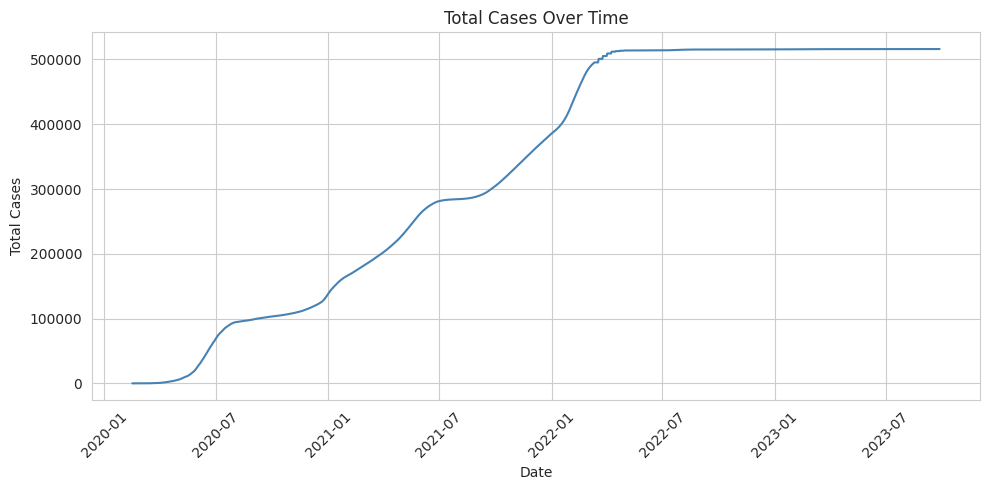

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
egypt = df[df['location'] == 'Egypt']

plt.figure(figsize=(10,5))
plt.plot(egypt['date'], egypt['total_cases'], color='steelblue')
plt.title('Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_35/971678123.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_new_cases = egypt.set_index('date')['new_cases'].resample('M').mean()


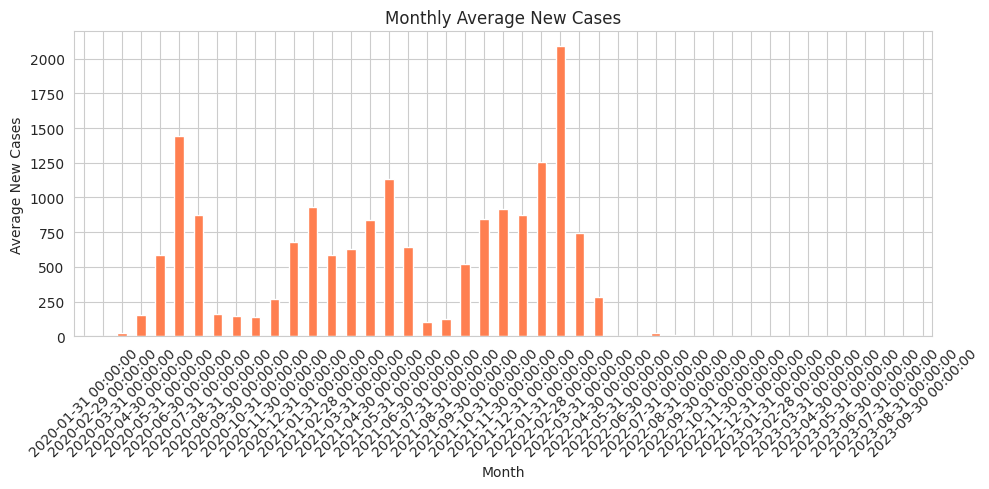

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
egypt = df[df['location'] == 'Egypt']

monthly_new_cases = egypt.set_index('date')['new_cases'].resample('M').mean()

plt.figure(figsize=(10,5))
monthly_new_cases.plot(kind='bar', color='coral')
plt.title('Monthly Average New Cases')
plt.xlabel('Month')
plt.ylabel('Average New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


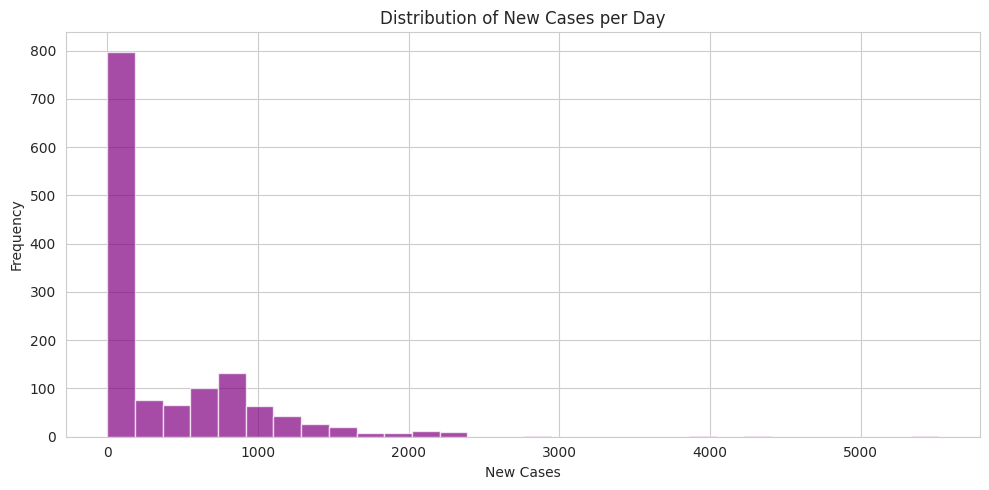

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
egypt = df[df['location'] == 'Egypt']

plt.figure(figsize=(10,5))
plt.hist(egypt['new_cases'].dropna(), bins=30, color='purple', alpha=0.7)
plt.title('Distribution of New Cases per Day')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


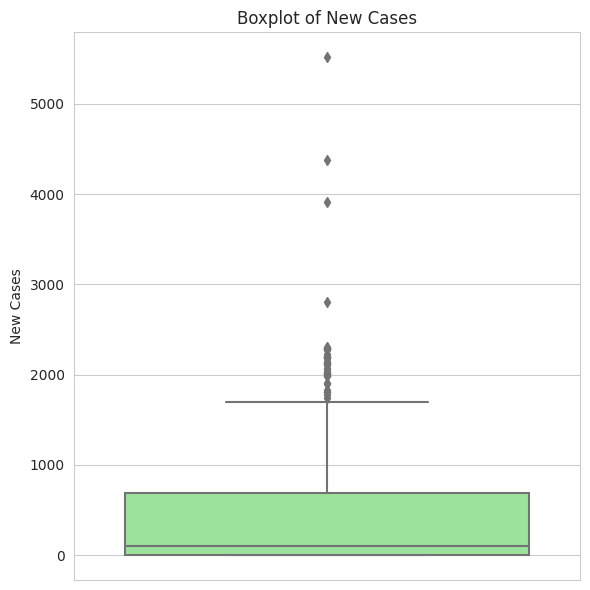

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
egypt = df[df['location'] == 'Egypt']

plt.figure(figsize=(6,6))
sns.boxplot(y=egypt['new_cases'].dropna(), color='lightgreen')
plt.title('Boxplot of New Cases')
plt.ylabel('New Cases')
plt.tight_layout()
plt.show()


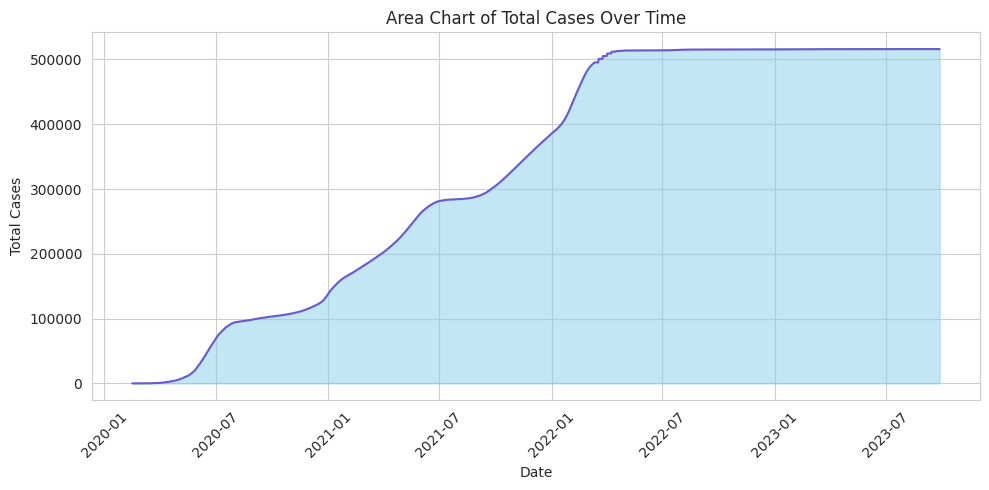

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
egypt = df[df['location'] == 'Egypt']

plt.figure(figsize=(10,5))
plt.fill_between(egypt['date'], egypt['total_cases'], color='skyblue', alpha=0.5)
plt.plot(egypt['date'], egypt['total_cases'], color='Slateblue')
plt.title('Area Chart of Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


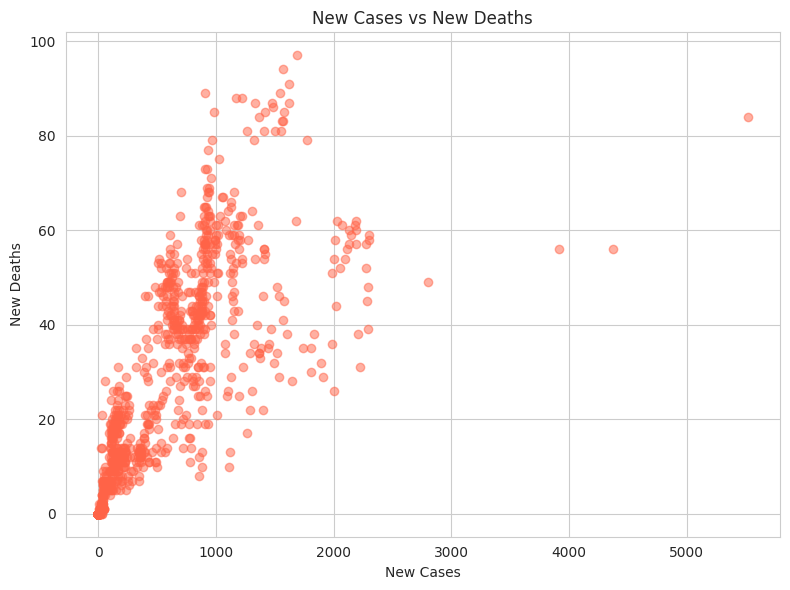

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
egypt = df[df['location'] == 'Egypt']

plt.figure(figsize=(8,6))
plt.scatter(egypt['new_cases'], egypt['new_deaths'], alpha=0.5, color='tomato')
plt.title('New Cases vs New Deaths')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.tight_layout()
plt.show()


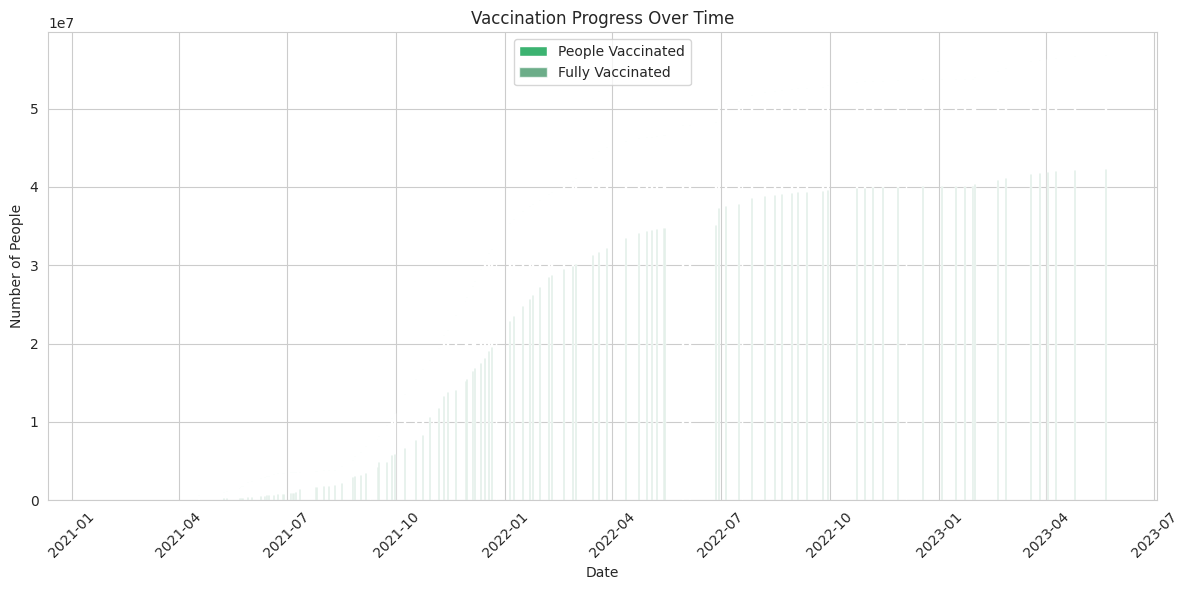

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
egypt = df[df['location'] == 'Egypt']

plt.figure(figsize=(12,6))
plt.bar(egypt['date'], egypt['people_vaccinated'], label='People Vaccinated', color='mediumseagreen')
plt.bar(egypt['date'], egypt['people_fully_vaccinated'], label='Fully Vaccinated', color='seagreen', alpha=0.7)
plt.title('Vaccination Progress Over Time')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


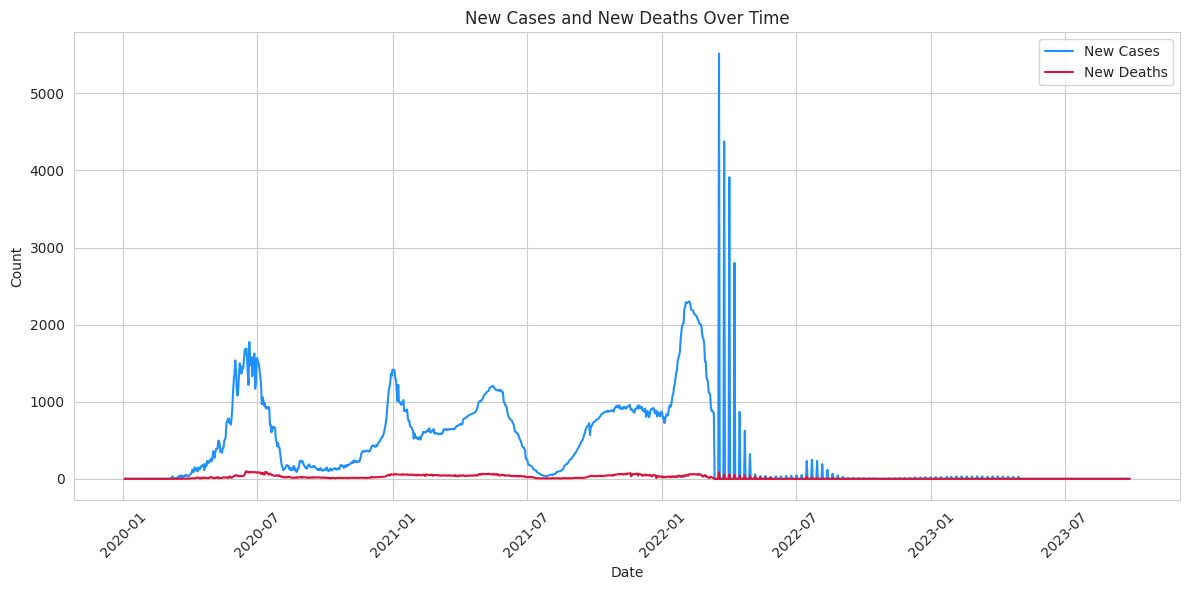

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
egypt = df[df['location'] == 'Egypt']

plt.figure(figsize=(12,6))
plt.plot(egypt['date'], egypt['new_cases'], label='New Cases', color='dodgerblue')
plt.plot(egypt['date'], egypt['new_deaths'], label='New Deaths', color='crimson')
plt.title('New Cases and New Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


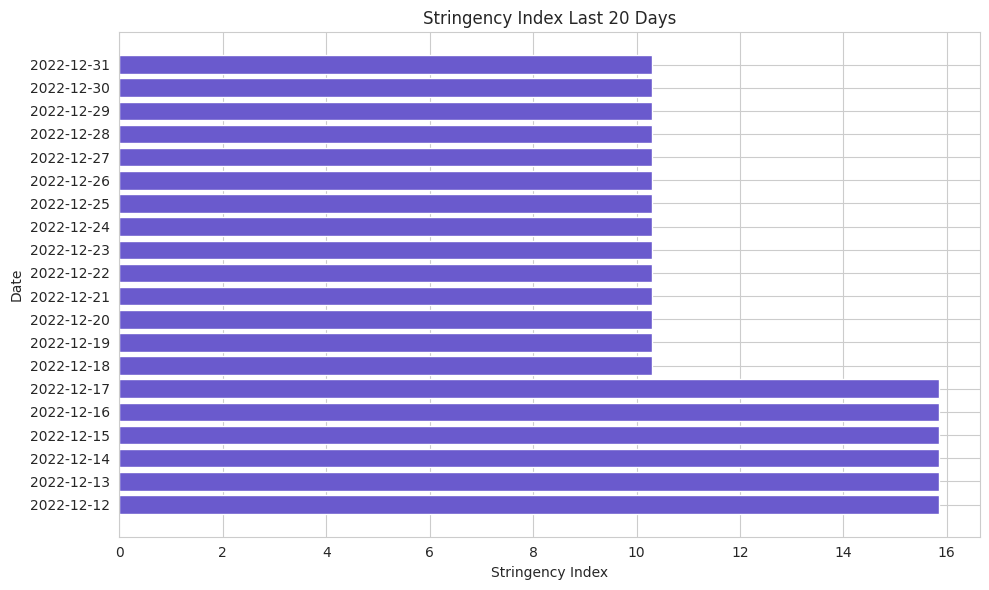

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
egypt = df[df['location'] == 'Egypt']


sample = egypt[['date', 'stringency_index']].dropna().tail(20)

plt.figure(figsize=(10,6))
plt.barh(sample['date'].dt.strftime('%Y-%m-%d'), sample['stringency_index'], color='slateblue')
plt.title('Stringency Index Last 20 Days')
plt.xlabel('Stringency Index')
plt.ylabel('Date')
plt.tight_layout()
plt.show()


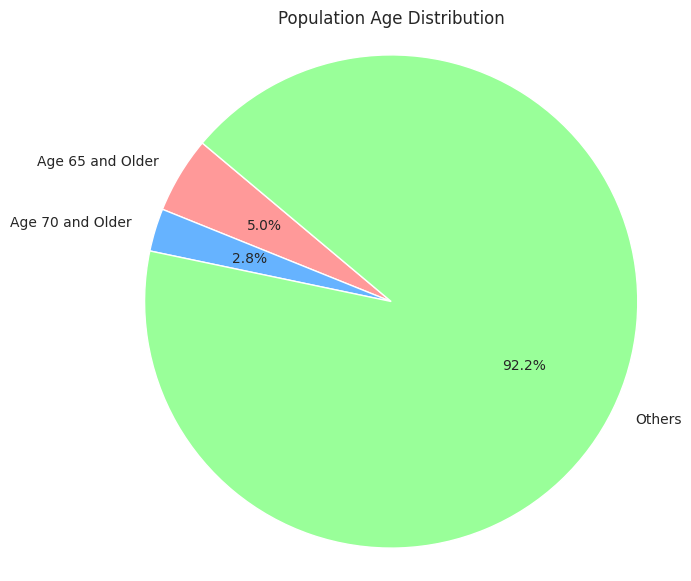

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
egypt = df[df['location'] == 'Egypt'].iloc[-1]

labels = ['Age 65 and Older', 'Age 70 and Older', 'Others']
sizes = [egypt['aged_65_older'], egypt['aged_70_older'], 100 - egypt['aged_65_older']]
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Population Age Distribution')
plt.axis('equal')
plt.show()


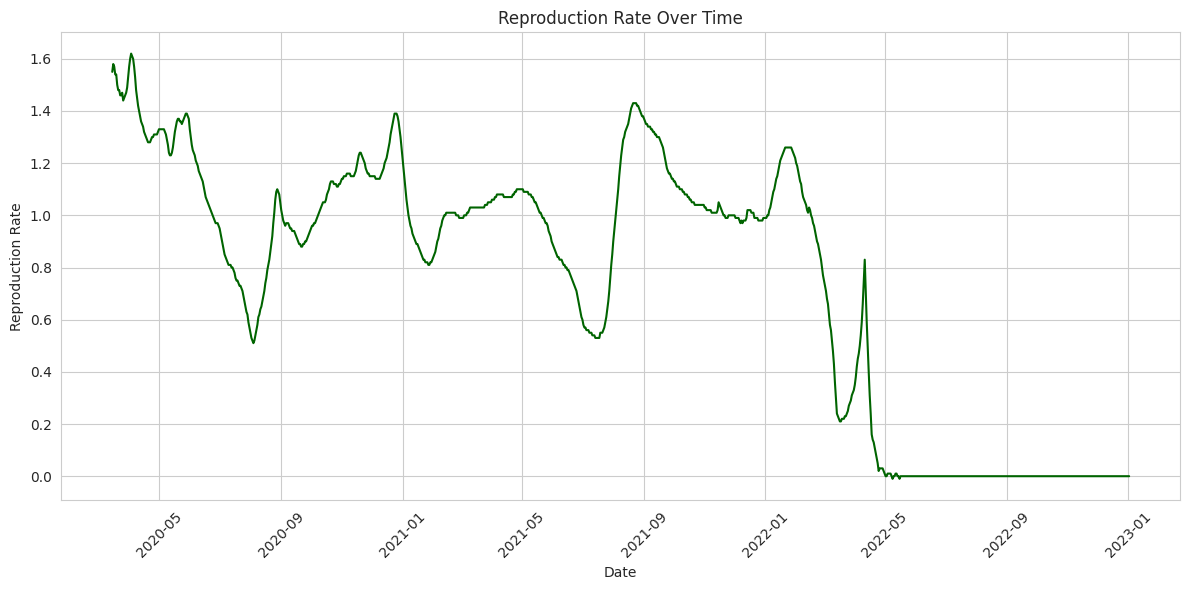

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
egypt = df[df['location'] == 'Egypt']

plt.figure(figsize=(12,6))
plt.plot(egypt['date'], egypt['reproduction_rate'], color='darkgreen')
plt.title('Reproduction Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Reproduction Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


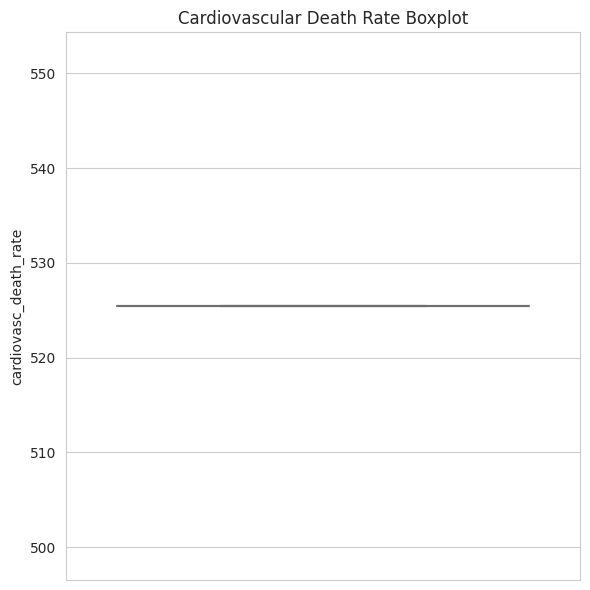

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
egypt = df[df['location'] == 'Egypt']

plt.figure(figsize=(6,6))
sns.boxplot(y=egypt['cardiovasc_death_rate'].dropna(), color='lightcoral')
plt.title('Cardiovascular Death Rate Boxplot')
plt.tight_layout()
plt.show()


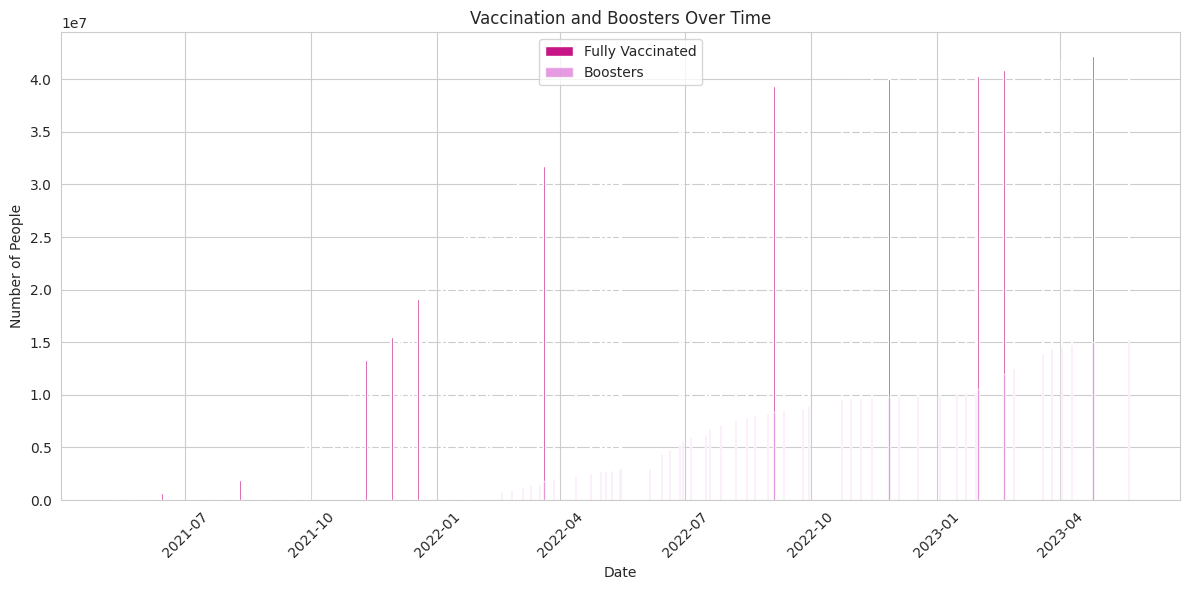

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
egypt = df[df['location'] == 'Egypt']

plt.figure(figsize=(12,6))
plt.bar(egypt['date'], egypt['people_fully_vaccinated'], label='Fully Vaccinated', color='mediumvioletred')
plt.bar(egypt['date'], egypt['total_boosters'], label='Boosters', color='orchid', alpha=0.7)
plt.title('Vaccination and Boosters Over Time')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


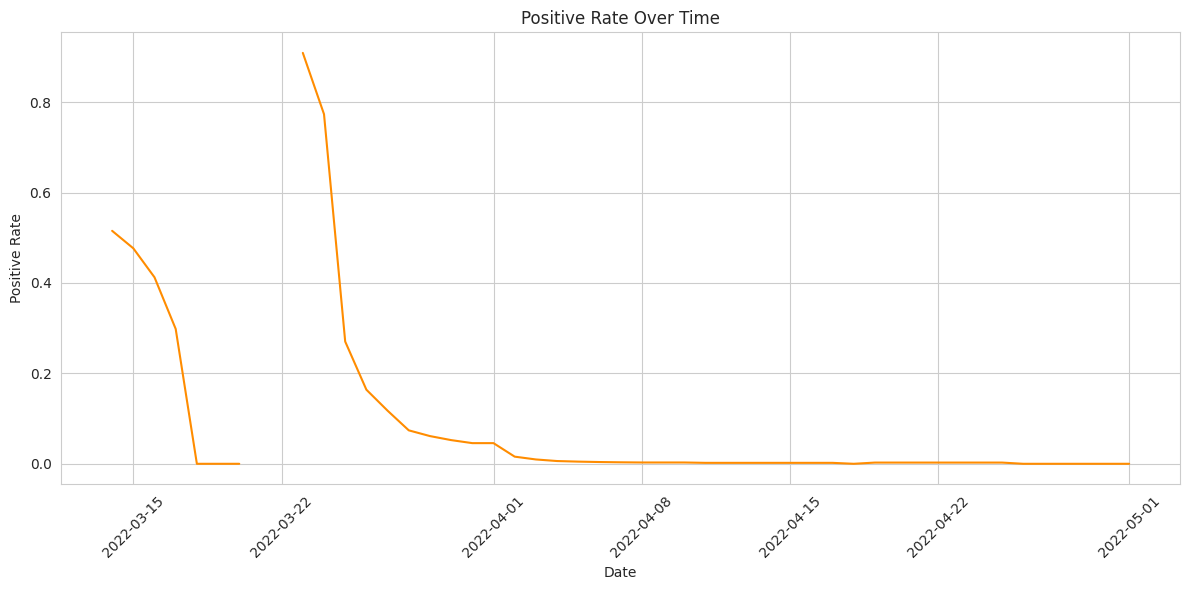

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
egypt = df[df['location'] == 'Egypt']

plt.figure(figsize=(12,6))
plt.plot(egypt['date'], egypt['positive_rate'], color='darkorange')
plt.title('Positive Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


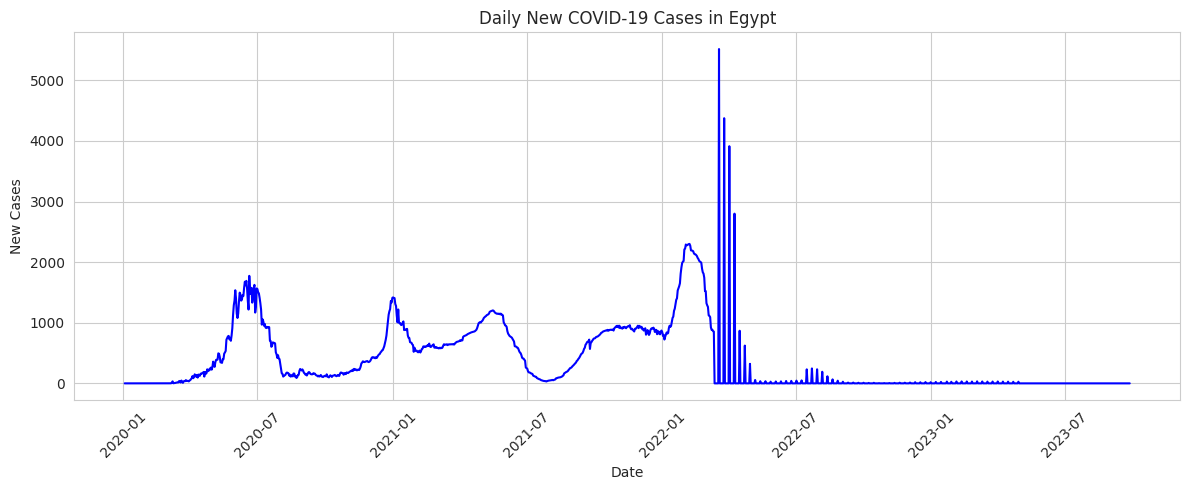

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/covid-19-dataset/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
egypt = df[df['location'] == 'Egypt']

plt.figure(figsize=(12,5))
plt.plot(egypt['date'], egypt['new_cases'], color='blue')
plt.title('Daily New COVID-19 Cases in Egypt')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_35/873532152.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = egypt.set_index('date')['new_cases'].resample('M').mean()


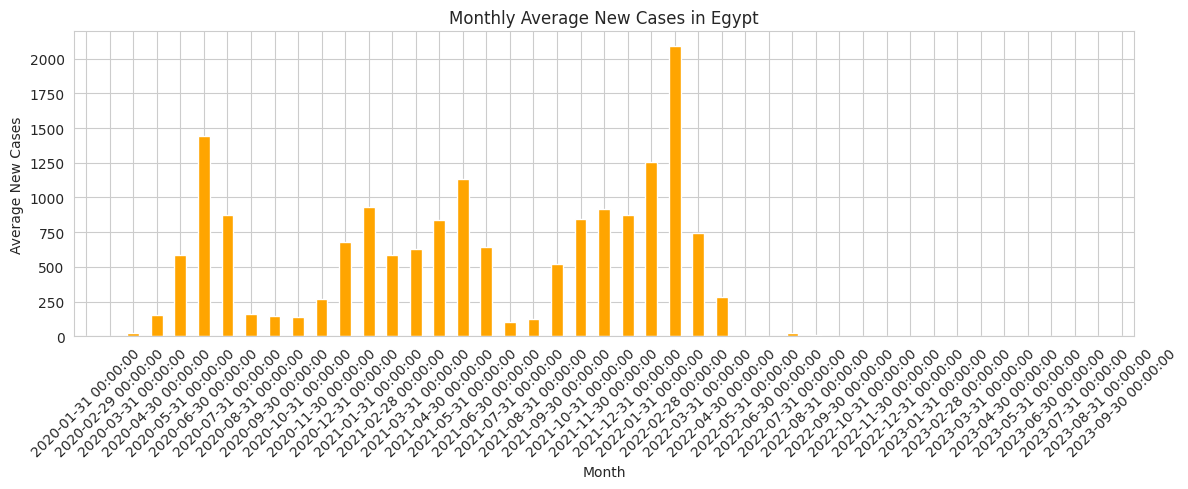

In [52]:
monthly_avg = egypt.set_index('date')['new_cases'].resample('M').mean()

plt.figure(figsize=(12,5))
monthly_avg.plot(kind='bar', color='orange')
plt.title('Monthly Average New Cases in Egypt')
plt.xlabel('Month')
plt.ylabel('Average New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


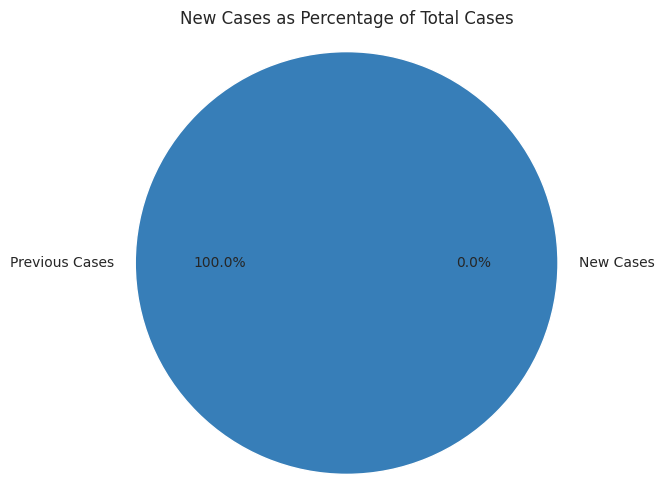

In [53]:
last_total = egypt['total_cases'].iloc[-1]
last_new = egypt['new_cases'].iloc[-1]
others = last_total - last_new

sizes = [last_new, others]
labels = ['New Cases', 'Previous Cases']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#4daf4a','#377eb8'])
plt.title('New Cases as Percentage of Total Cases')
plt.axis('equal')
plt.show()



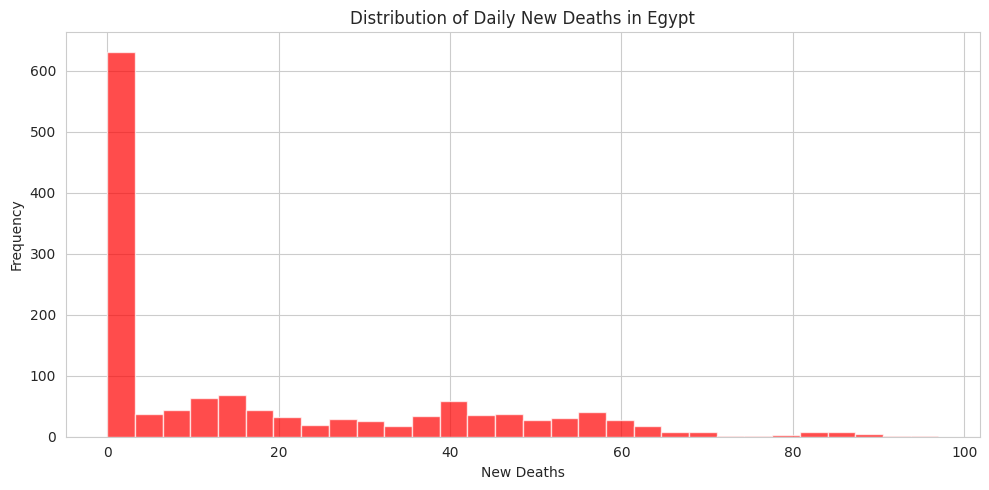

In [54]:
plt.figure(figsize=(10,5))
plt.hist(egypt['new_deaths'].dropna(), bins=30, color='red', alpha=0.7)
plt.title('Distribution of Daily New Deaths in Egypt')
plt.xlabel('New Deaths')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


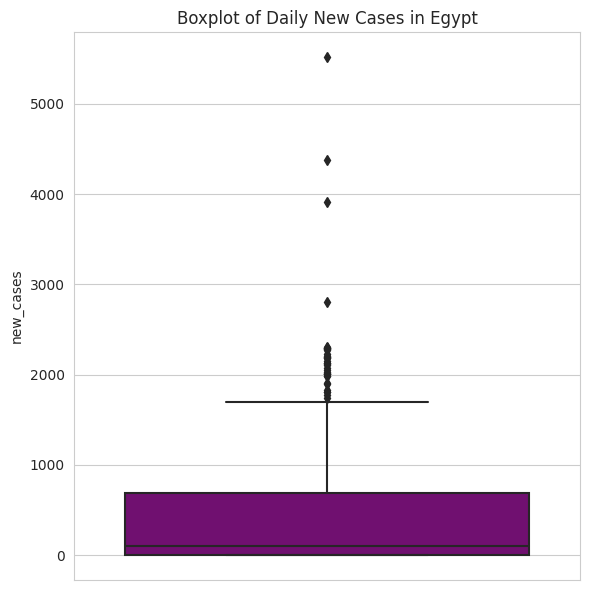

In [55]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.boxplot(y=egypt['new_cases'].dropna(), color='purple')
plt.title('Boxplot of Daily New Cases in Egypt')
plt.tight_layout()
plt.show()


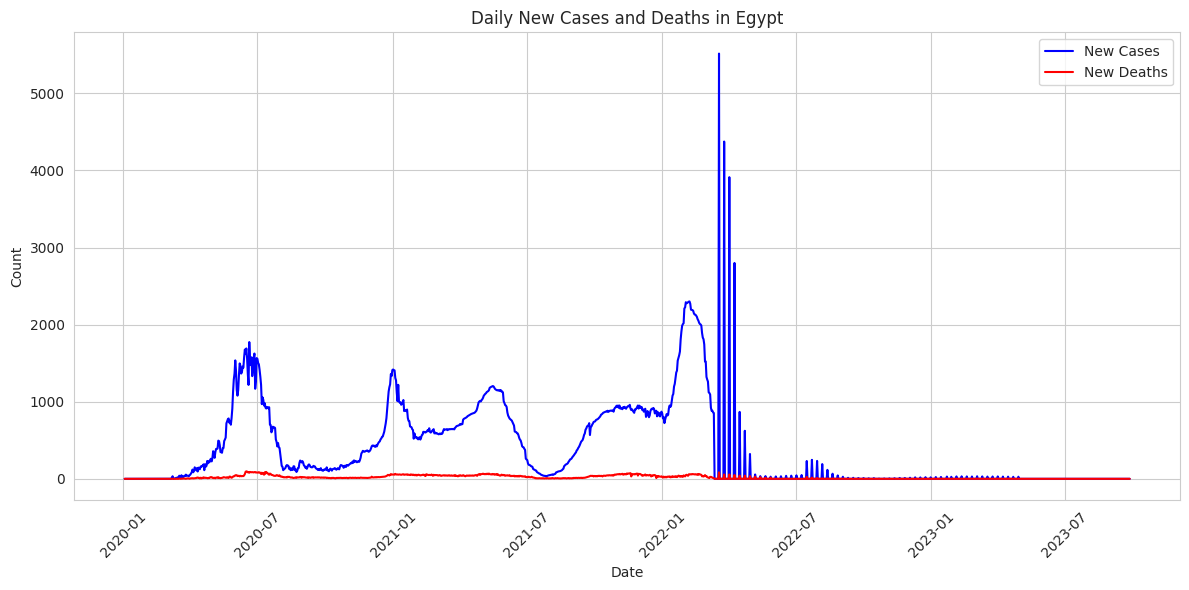

In [56]:
plt.figure(figsize=(12,6))
plt.plot(egypt['date'], egypt['new_cases'], label='New Cases', color='blue')
plt.plot(egypt['date'], egypt['new_deaths'], label='New Deaths', color='red')
plt.title('Daily New Cases and Deaths in Egypt')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
